In [1]:
import base64
import io

import requests
from PIL import Image


def array_to_base64(arr):
    img = Image.fromarray(arr)
    buffered = io.BytesIO()
    img.save(buffered, format="PNG")
    return base64.b64encode(buffered.getvalue()).decode()


with open('granny/timber_wolf.jpg', 'rb') as f:
    input_data = base64.b64encode(f.read()).decode()


# input_image = Image.open('granny/granny_8.jpeg')
# input_data = array_to_base64(np.array(input_image))

def query(input_data):
    response = requests.post('http://granny.advml.com/score', json={'data': input_data})
    return response.json()['output']


len(query(input_data))

1000

In [2]:
import tensorflow as tf

mobile_net = tf.keras.applications.mobilenet_v2.MobileNetV2(
    input_shape=None,
    alpha=1.0,
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax',
)

In [6]:
## figure out how to get the image into the right format
## just do this in a normal python script
## copilot to the rescue
# image_net.call(np.array(input_image))

AttributeError: 'numpy.ndarray' object has no attribute '_keras_mask'

In [28]:
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['figure.figsize'] = (8, 8)
mpl.rcParams['axes.grid'] = False

In [3]:
pretrained_model = tf.keras.applications.MobileNetV2(include_top=True,
                                                     weights='imagenet')
pretrained_model.trainable = False

# ImageNet labels
decode_predictions = tf.keras.applications.mobilenet_v2.decode_predictions

In [4]:
# Get the class indices
import numpy as np
# Get the class indices
class_indices = tf.keras.applications.mobilenet_v2.decode_predictions(
    np.array([list(range(1000))]), top=1000
)[0]
class_indices = np.array(class_indices)
class_ids = class_indices[:,2]
class_name = list(class_indices[:,1][::-1])
class_name = [x.replace('_', ' ') for x in class_name]
print(class_name)


['tench', 'goldfish', 'great white shark', 'tiger shark', 'hammerhead', 'electric ray', 'stingray', 'cock', 'hen', 'ostrich', 'brambling', 'goldfinch', 'house finch', 'junco', 'indigo bunting', 'robin', 'bulbul', 'jay', 'magpie', 'chickadee', 'water ouzel', 'kite', 'bald eagle', 'vulture', 'great grey owl', 'European fire salamander', 'common newt', 'eft', 'spotted salamander', 'axolotl', 'bullfrog', 'tree frog', 'tailed frog', 'loggerhead', 'leatherback turtle', 'mud turtle', 'terrapin', 'box turtle', 'banded gecko', 'common iguana', 'American chameleon', 'whiptail', 'agama', 'frilled lizard', 'alligator lizard', 'Gila monster', 'green lizard', 'African chameleon', 'Komodo dragon', 'African crocodile', 'American alligator', 'triceratops', 'thunder snake', 'ringneck snake', 'hognose snake', 'green snake', 'king snake', 'garter snake', 'water snake', 'vine snake', 'night snake', 'boa constrictor', 'rock python', 'Indian cobra', 'green mamba', 'sea snake', 'horned viper', 'diamondback', 

In [5]:
c = query(input_data)

In [6]:
sorted_b = sorted(c, key=lambda x: class_name.index(x[1]))

In [7]:
sorted_b

[[0.00022751725919079036, 'tench'],
 [0.0002481602714397013, 'goldfish'],
 [0.0004718357522506267, 'great white shark'],
 [0.0005248812958598137, 'tiger shark'],
 [0.0003824726736638695, 'hammerhead'],
 [0.00045764417154714465, 'electric ray'],
 [0.0003204704844392836, 'stingray'],
 [0.00033330920268781483, 'cock'],
 [0.0002255424769828096, 'hen'],
 [0.0003290693275630474, 'ostrich'],
 [0.0002248407545266673, 'brambling'],
 [0.0002410819724900648, 'goldfinch'],
 [0.00014528540486935526, 'house finch'],
 [0.0001367950317217037, 'junco'],
 [0.0002012558252317831, 'indigo bunting'],
 [0.00014165013271849602, 'robin'],
 [0.00023999842233024538, 'bulbul'],
 [0.00033642479684203863, 'jay'],
 [0.0001646356686251238, 'magpie'],
 [0.00025755082606337965, 'chickadee'],
 [0.0002473923086654395, 'water ouzel'],
 [0.00023876050545368344, 'kite'],
 [0.00022500903287436813, 'bald eagle'],
 [0.0003492302494123578, 'vulture'],
 [0.001335897482931614, 'great grey owl'],
 [0.0003528695378918201, 'Europea

In [8]:
tns = tf.convert_to_tensor(np.array(sorted_b)[:,0].astype(np.float32).reshape(1,1000))

In [108]:
tns

<tf.Tensor: shape=(1, 1000), dtype=float32, numpy=
array([[3.37426754e-04, 3.43834574e-04, 7.48660066e-04, 7.67800317e-04,
        5.47870877e-04, 7.41605822e-04, 4.81763069e-04, 4.94718493e-04,
        4.75831010e-04, 2.37240660e-04, 4.49434912e-04, 4.60517447e-04,
        3.02337779e-04, 2.15587148e-04, 2.64430855e-04, 2.45974748e-04,
        3.88250104e-04, 4.65044926e-04, 2.44214782e-04, 3.61142622e-04,
        3.41893639e-04, 4.00732650e-04, 3.13843659e-04, 3.56208649e-04,
        1.73297385e-03, 4.86632081e-04, 6.05876208e-04, 6.33025542e-04,
        5.92523022e-04, 4.08529449e-04, 3.61647049e-04, 4.02606791e-04,
        4.05785773e-04, 3.03323584e-04, 3.23156157e-04, 5.34971536e-04,
        2.47735181e-04, 4.38516610e-04, 3.01921391e-04, 3.44041066e-04,
        5.75165555e-04, 4.83309705e-04, 4.23072022e-04, 6.46549335e-04,
        4.77270107e-04, 2.57069594e-04, 6.51074515e-04, 4.91971266e-04,
        2.30163452e-04, 1.04449468e-03, 9.68141248e-04, 3.55739845e-04,
        8.654

In [9]:
with open('granny/granny_8.jpeg', 'rb') as f:
    input_data1 = base64.b64encode(f.read()).decode()
query(input_data1)[0:5]

[[0.9347063302993774, 'Granny Smith'],
 [0.004349630791693926, 'spaghetti squash'],
 [0.003459166968241334, 'lemon'],
 [0.003027713391929865, 'gong'],
 [0.002812823513522744, 'tennis ball']]

In [10]:
with open('granny/timber_wolf.jpg', 'rb') as f:
    input_data = base64.b64encode(f.read()).decode()
image_raw = tf.io.read_file('granny/granny_8.jpeg')
image = tf.image.decode_image(image_raw)

In [11]:
# Helper function to preprocess the image so that it can be inputted in MobileNetV2



# Helper function to extract labels from probability vector
def get_imagenet_label(probs):
    return decode_predictions(probs, top=1)[0][0]

def get_class_names():
    class_indices = tf.keras.applications.mobilenet_v2.decode_predictions(np.array([list(range(1000))]), top=1000)[0]
    class_indices = np.array(class_indices)
    class_name = list(class_indices[:,1][::-1])
    class_name = [x.replace('_', ' ') for x in class_name]
    return class_name

def preprocess(image):
    image = tf.cast(image, tf.float32)
    image = tf.image.resize(image, (224, 224))
    image = tf.keras.applications.mobilenet_v2.preprocess_input(image)
    image = image[None, ...]
    return image

with open('granny/timber_wolf.jpg', 'rb') as f:
    input_data = base64.b64encode(f.read()).decode()
image_raw = tf.io.read_file('granny/granny_8.jpeg')
image = tf.image.decode_image(image_raw)

image = preprocess(image)
image_probs = pretrained_model.predict(image)


plt.figure()
plt.imshow(image[0] * 0.5 + 0.5)  # To change [-1, 1] to [0,1]
_, image_class, class_confidence = get_imagenet_label(image_probs)
plt.title('{} : {:.2f}% Confidence'.format(image_class, class_confidence * 100))
plt.show()

1/1 [==============================] - 2s 2s/step


NameError: name 'plt' is not defined

1/1 [==============================] - 0s 66ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


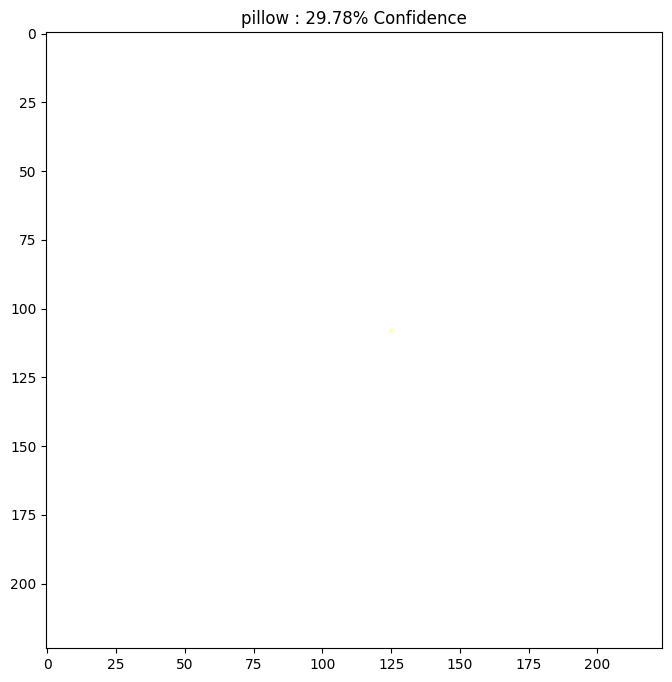

In [135]:
query(input_data)[0:5]


[[0.28575703501701355, 'timber wolf'],
 [0.13912102580070496, 'red wolf'],
 [0.1217745989561081, 'coyote'],
 [0.02413186803460121, 'dingo'],
 [0.01603207364678383, 'Eskimo dog']]

In [86]:
pretrained_model(image)

<tf.Tensor: shape=(1, 1000), dtype=float32, numpy=
array([[2.30301167e-10, 2.43177267e-11, 3.09586072e-11, 3.82978232e-11,
        5.20816064e-11, 2.39205314e-12, 6.03846070e-11, 6.64756401e-12,
        1.13530331e-11, 1.23479534e-11, 2.60556455e-11, 1.07322831e-11,
        1.57236307e-11, 1.09325882e-11, 2.50903257e-11, 1.46887502e-11,
        7.55336505e-12, 1.51074292e-11, 4.70409302e-12, 1.68635557e-11,
        6.31596251e-12, 4.79233007e-11, 9.62943809e-13, 8.35822991e-12,
        4.86547781e-11, 2.84830471e-12, 1.08552715e-11, 4.69866090e-11,
        2.15995295e-11, 2.12020072e-11, 8.32250588e-11, 4.98132473e-11,
        1.90143856e-11, 2.13835742e-12, 3.13995531e-12, 1.03556044e-11,
        6.84705201e-12, 1.51577084e-11, 5.40489806e-11, 2.84584075e-11,
        3.92939951e-11, 1.78844509e-11, 3.45990007e-11, 2.65281755e-11,
        9.44243728e-12, 1.34164927e-11, 7.04903358e-11, 2.86079598e-11,
        1.64435601e-11, 1.10293510e-11, 3.03798584e-11, 2.40774102e-11,
        1.470

In [12]:
import numpy as np
def save_img_load_b64(image):
    x = image.numpy()
    mn = np.min(x)
    mx = np.max(x)
    x = np.uint8( (x-mn)/(mx-mn)*255 )[0,:,:,:]
    Image.fromarray(x).save('granny/granny_changed.png')
    with open('granny/granny_changed.png', 'rb') as f:
        input_data = base64.b64encode(f.read()).decode()
    return input_data

In [13]:
def order_predicitons_tf(preds, class_name):
    preds_sorted = sorted(preds, key=lambda x: class_name.index(x[1]))
    return tf.convert_to_tensor(np.array(preds_sorted)[:,0].astype(np.float32).reshape(1,1000))
    
    

In [14]:
loss_object = tf.keras.losses.CategoricalCrossentropy()

class_name = get_class_names()
def create_adversarial_pattern(input_image, input_label):
    with tf.GradientTape() as tape:
        tape.watch(input_image)
        prediction = pretrained_model(input_image)
        loss = loss_object(input_label, prediction)

    # Get the gradients of the loss w.r.t to the input image.
    gradient = tape.gradient(loss, input_image)
    # Get the sign of the gradients to create the perturbation
    signed_grad = tf.sign(gradient)
    return signed_grad, gradient

1000


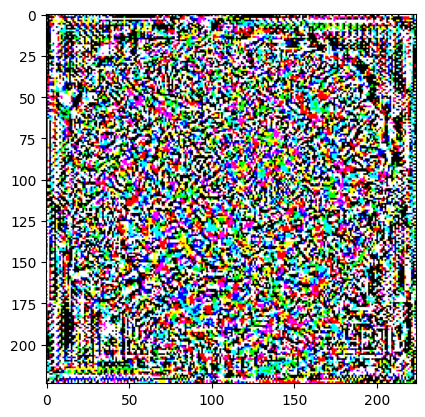

In [15]:
import matplotlib.pyplot as plt
# Get the input label of the image.
granny_index = 948
print(image_probs.shape[-1])
label = tf.one_hot(granny_index, image_probs.shape[-1])
label = tf.reshape(label, (1, image_probs.shape[-1]))

perturbations, _ = create_adversarial_pattern(image, label)
plt.imshow(perturbations[0] * 0.5 + 0.5);  # To change [-1, 1] to [0,1]

In [138]:
def display_images(image, description):
    _, label, confidence = get_imagenet_label(pretrained_model.predict(image))
    plt.figure()
    plt.imshow(image[0] * 0.5 + 0.5)
    plt.title('{} \n {} : {:.2f}% Confidence'.format(description,
                                                     label, confidence * 100))
    plt.show()

In [140]:
epsilons = [0, 0.01, 0.1, 0.15]
descriptions = [('Epsilon = {:0.3f}'.format(eps) if eps else 'Input')
                for eps in epsilons]

learning_rate = 0.01
for k in range(100):
    print(k, ', ', end='')
    perturbations, gr = create_adversarial_pattern(image, label)
    image -= learning_rate * perturbations
    # print(query(save_img_load_b64(image))[0:1])

display_images(image, '')

0 , [[0.3530193567276001, 'timber wolf']]
1 , [[0.3980664014816284, 'timber wolf']]
2 , [[0.3880324065685272, 'timber wolf']]
3 , [[0.41916054487228394, 'timber wolf']]
4 , [[0.4136538803577423, 'timber wolf']]
5 , [[0.4299418032169342, 'timber wolf']]
6 , [[0.3960452079772949, 'timber wolf']]
7 , [[0.4066605567932129, 'timber wolf']]
8 , [[0.4006393849849701, 'timber wolf']]
9 , [[0.36929428577423096, 'timber wolf']]
10 , [[0.37399783730506897, 'timber wolf']]
11 , [[0.4113959074020386, 'timber wolf']]
12 , [[0.3817450702190399, 'timber wolf']]
13 , [[0.40750548243522644, 'timber wolf']]
14 , [[0.3547475337982178, 'timber wolf']]
15 , [[0.36246517300605774, 'timber wolf']]
16 , [[0.35825487971305847, 'timber wolf']]
17 , [[0.3589097559452057, 'timber wolf']]
18 , [[0.3742268979549408, 'timber wolf']]
19 , [[0.3827034831047058, 'timber wolf']]
20 , [[0.37233003973960876, 'timber wolf']]
21 , [[0.3617939352989197, 'timber wolf']]
22 , [[0.39620301127433777, 'timber wolf']]
23 , [[0.3881

KeyboardInterrupt: 

In [45]:
import numpy as np
# SAVE MODIFIED IMAGE AS PNG
x = image.numpy()
mn = np.min(x)
mx = np.max(x)
x = np.uint8( (x-mn)/(mx-mn)*255 )[0,:,:,:]
Image.fromarray(x).save('granny/granny_changed.png')

In [47]:
with open('granny/granny_changed.png', 'rb') as f:
    input_data = base64.b64encode(f.read()).decode()


def query(input_data):
    response = requests.post('http://granny.advml.com/score', json={'data': input_data})
    return response.json()['output']


query(input_data)

[[0.23663893342018127, 'timber wolf'],
 [0.07946321368217468, 'red wolf'],
 [0.05135736241936684, 'coyote'],
 [0.04075859487056732, 'dingo'],
 [0.018257834017276764, 'white wolf'],
 [0.017952952533960342, 'Eskimo dog'],
 [0.014039941132068634, 'Norwegian elkhound'],
 [0.013773800805211067, 'malamute'],
 [0.0072463941760361195, 'Siberian husky'],
 [0.004848250653594732, 'grey fox'],
 [0.004685803782194853, 'dhole'],
 [0.0035212973598390818, 'German shepherd'],
 [0.0026797805912792683, 'lynx'],
 [0.002357563702389598, 'dogsled'],
 [0.0021319573279470205, 'kelpie'],
 [0.002080784644931555, 'muzzle'],
 [0.002055241959169507, 'kit fox'],
 [0.0017394927563145757, 'tennis ball'],
 [0.0017329738475382328, 'great grey owl'],
 [0.0016875900328159332, 'African hunting dog'],
 [0.001682934002019465, 'electric locomotive'],
 [0.0016411966644227505, 'red fox'],
 [0.001584524055942893, 'black stork'],
 [0.0015561211621388793, 'bath towel'],
 [0.0014681436587125063, 'ant'],
 [0.0013883591163903475, 'T

In [4]:
import numpy as np
import requests
import base64
from PIL import Image
with open('granny/timber_wolf.png', 'rb') as f:
    file1 = f.read()


# Load the wolf image
img = Image.open('granny/timber_wolf.png')

# print(file1)
print(img.tobytes() == file1)

img_np = np.asarray(img).astype(np.float32) / 255.0  # Normalize to [0, 1]
img_send = base64.b64(img.tobytes()).decode()
def query(input_data):
    response = requests.post('http://granny.advml.com/score', json={'data': img_send})
    return response.json()

print(query(img_np))
# Black-box FGSM-like attack
# def black_box_attack(image_np, epsilon):
#     perturbed_image = image_np.copy()
#     predictions_original = query(image_np)
    
#     for x in range(image_np.shape[0]):
#         for y in range(image_np.shape[1]):
#             perturb_up = image_np.copy()
#             perturb_down = image_np.copy()

#             perturb_up[x, y] = min(1.0, image_np[x, y] + epsilon)
#             perturb_down[x, y] = max(0.0, image_np[x, y] - epsilon)
            
#             delta_up = abs(query(perturb_up)["prediction"] - predictions_original["prediction"])
#             delta_down = abs(query(perturb_down)["prediction"] - predictions_original["prediction"])

#             if delta_up > delta_down:
#                 perturbed_image[x, y] = perturb_up[x, y]
#             else:
#                 perturbed_image[x, y] = perturb_down[x, y]
    
#     return perturbed_image

# adversarial_img = black_box_attack(img_np, 0.01)


False


AttributeError: module 'base64' has no attribute 'b64encodebytes'